In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from mplsoccer import Pitch
from mplsoccer import VerticalPitch
import numpy as np

In [3]:
files = os.listdir("Passes")

In [4]:
files

['AFPasses.csv',
 'bakersfieldPasses.csv',
 'calPolyPasses.csv',
 'csunPasses.csv',
 'DukePasses.csv',
 'fullertonPasses.csv',
 'LipscombPasses.csv',
 'NavyPasses.csv',
 'riversidePasses.csv',
 'sacStatePasses.csv',
 'SantaClaraPasses.csv',
 'SJSPasses.csv',
 'UCDPsses.csv',
 'UCIPasses.csv',
 'UCSBPasses.csv',
 'USDPasses.csv',
 'UVPasses.csv']

In [5]:
merged = pd.read_csv("Passes/"+files[0])
merged = merged.drop("Distance",axis = 1)
merged["Game"]=files[0].replace("Passes.csv","")
for file in files:
    df = pd.read_csv("Passes/"+file)
    if "Distance" in df.columns:
        df = df.drop("Distance",axis = 1)
    df["Game"]=file.replace("Passes.csv","")
    merged = pd.merge(merged,df,how="outer")
def distance(startX,startY,endX,endY):
    return np.sqrt((endX-startX)**2+(endY-startY)**2)
merged = merged.assign(Distance = distance(merged.get("x1"),merged.get("y1"),merged.get("x2"),merged.get("y2")))
merged["angle"] = np.arctan((merged.y2-merged.y1)/(merged.x2-merged.x1),)
#merged[(merged.get("angle")<=np.sqrt(2)/2) &(merged.get("angle")>=-1*np.sqrt(2)/2)]

In [6]:
left = merged[(merged.get("y1")<40)&(merged.get("y2")<40)]
right = merged[(merged.get("y1")>40)&(merged.get("y2")>40)]
switch = merged[((merged.get("y1")>40)&(merged.get("y2")<=40)) | ((merged.get("y1")<45)&(merged.get("y2")>=40))]
leftPerc = left[left.get("result")].shape[0]/left.shape[0]
rightPerc = right[right.get("result")].shape[0]/right.shape[0]
switchPerc = switch[switch.get("result")].shape[0]/switch.shape[0]
print(leftPerc, rightPerc, switchPerc)
print(left.shape[0],right.shape[0],switch.shape[0])

0.7813528336380255 0.7806981519507187 0.8181818181818182
2735 2435 1408


In [7]:
successful = merged[merged.get("result")]
unsuccessful = merged[~merged.get("result")]
key = merged[merged.get("key pass")]
forward = merged[(merged.get("angle")<=np.sqrt(2)/2) &(merged.get("angle")>=-1*np.sqrt(2)/2)]
forwardSuccessful = forward[forward.get("result")]
forwardUnsuccessful = forward[~forward.get("result")]
oppHalf = merged[(merged.get("x2")>=60)&(merged.get("x1")>=60)]
oppHalfSuccessful = oppHalf[oppHalf.get("result")]
oppHalfUnsuccessful = oppHalf[~oppHalf.get("result")]
attackingThird = merged[merged.get("x2")>=80]
attackingThirdSuccessful = attackingThird[attackingThird.get("result")]
attackingThirdUnsuccessful = attackingThird[~attackingThird.get("result")]
allTheWay = merged[(merged.get("x2")>=80)&(merged.get("x1")>=80)]
allTheWaySuccessful = allTheWay[allTheWay.get("result")]
deepPasses = successful[(successful.get("x2")>102)&(successful.get("y2")<62)&(successful.get("y2")>18)&(successful.get("y1")<70)&(successful.get("y1")>5)]
longPasses = merged[merged.get("Distance")>=40]

In [8]:
left = forward[(forward.get("y1")<40)&(forward.get("y2")<40)]
right = forward[(forward.get("y1")>40)&(forward.get("y2")>40)]
switch = forward[((forward.get("y1")>40)&(forward.get("y2")<=40)) | ((merged.get("y1")<45)&(merged.get("y2")>=40))]
leftPerc = left[left.get("result")].shape[0]/left.shape[0]
rightPerc = right[right.get("result")].shape[0]/right.shape[0]
switchPerc = switch[switch.get("result")].shape[0]/switch.shape[0]
print("Accuracy", leftPerc, rightPerc, switchPerc)
print(left.shape[0],right.shape[0],switch.shape[0])
print(forward["result"].mean())

Accuracy 0.7599754450583179 0.7579750346740638 0.6698717948717948
1629 1442 312
0.7527987897125568


In [9]:
left = attackingThirdSuccessful[(attackingThirdSuccessful.get("y1")<40)&(attackingThirdSuccessful.get("y2")<40)]
right = attackingThirdSuccessful[(attackingThirdSuccessful.get("y1")>40)&(attackingThirdSuccessful.get("y2")>40)]
switch = attackingThirdSuccessful[((attackingThirdSuccessful.get("y1")>40)&(attackingThirdSuccessful.get("y2")<=40)) | ((attackingThirdSuccessful.get("y1")<45)&(attackingThirdSuccessful.get("y2")>=40))]
leftPerc = left.shape[0]/attackingThirdSuccessful.shape[0]
rightPerc = right.shape[0]/attackingThirdSuccessful.shape[0]
switchPerc = switch.shape[0]/attackingThirdSuccessful.shape[0]
print("Percentage accurate", leftPerc, rightPerc, switchPerc)
print(left.shape[0],right.shape[0],switch.shape[0])

Percentage accurate 0.4656652360515021 0.3905579399141631 0.1630901287553648
651 546 228


In [10]:
left = attackingThird[(attackingThird.get("y1")<40)&(attackingThird.get("y2")<40)]
right = attackingThird[(attackingThird.get("y1")>40)&(attackingThird.get("y2")>40)]
switch = attackingThird[((attackingThird.get("y1")>40)&(attackingThird.get("y2")<=40)) | ((attackingThird.get("y1")<45)&(attackingThird.get("y2")>=40))]
leftPerc = left[left.get("result")].shape[0]/left.shape[0]
rightPerc = right[right.get("result")].shape[0]/right.shape[0]
switchPerc = switch[switch.get("result")].shape[0]/switch.shape[0]
print("Accuracy", leftPerc, rightPerc, switchPerc)
print(left.shape[0],right.shape[0],switch.shape[0])

Accuracy 0.7060737527114967 0.6594202898550725 0.5846153846153846
922 828 390


In [11]:
left = oppHalf[(oppHalf.get("y1")<40)&(oppHalf.get("y2")<40)]
right = oppHalf[(oppHalf.get("y1")>40)&(oppHalf.get("y2")>40)]
switch = oppHalf[((oppHalf.get("y1")>40)&(oppHalf.get("y2")<=40)) | ((oppHalf.get("y1")<45)&(oppHalf.get("y2")>=40))]
leftPerc = left[left.get("result")].shape[0]/left.shape[0]
rightPerc = right[right.get("result")].shape[0]/right.shape[0]
switchPerc = switch[switch.get("result")].shape[0]/switch.shape[0]
print("Accuracy", leftPerc, rightPerc, switchPerc)
print(left.shape[0],right.shape[0],switch.shape[0])

Accuracy 0.781785392245266 0.7635416666666667 0.7038724373576309
1109 960 439


In [12]:
forward.shape[0]

3305

Text(0.5, 1.0, 'UCSD Unsuccessful Passes Starting Location')

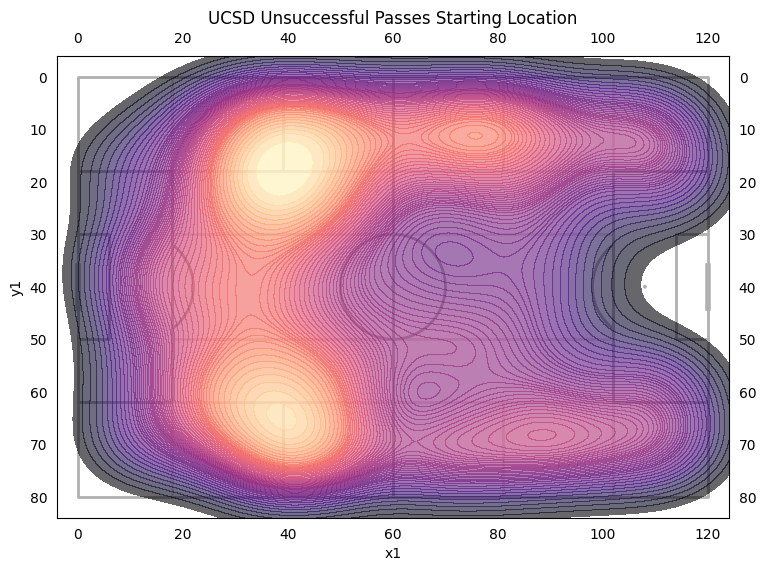

In [13]:
df = unsuccessful
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=df.get("x1"),y=df.get("y1"),fill = True,shade_lowest = False,alpha = .6,n_levels = 60,cmap = "magma")
# for i in range(df.shape[0]):
#     row = df.iloc[i]
#     if row.get("key pass")==True:
#         color = "purple"
#     elif row.get("result"):
#         color = "green"
#     else:
#         color = "red"
    
#     plt.arrow(row.get("x1"),row.get("y1"),row.get("x2")-row.get("x1"),row.get("y2")-row.get("y1"),width = .2,alpha = .1,color = color)
plt.title("UCSD Unsuccessful Passes Starting Location")

Text(0.5, 1.0, 'UCSD Unsuccessful Passes Ending Location')

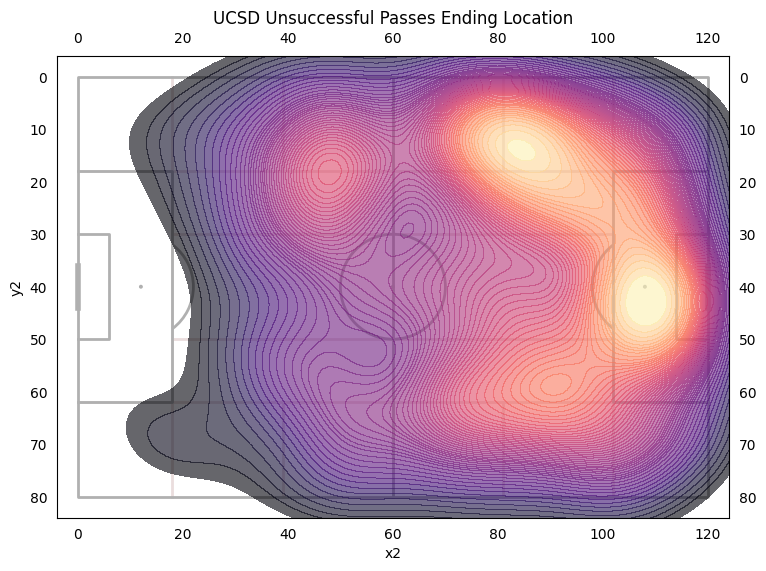

In [14]:
df = unsuccessful
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=df.get("x2"),y=df.get("y2"),fill = True,shade_lowest = False,alpha = .6,n_levels = 60,cmap = "magma")
for i in range(df.shape[0]):
    row = df.iloc[i]
    if row.get("key pass")==True:
        color = "purple"
    elif row.get("result"):
        color = "green"
    else:
        color = "red"
    
    #plt.arrow(row.get("x1"),row.get("y1"),row.get("x2")-row.get("x1"),row.get("y2")-row.get("y1"),width = .2,alpha = .1,color = color)
plt.title("UCSD Unsuccessful Passes Ending Location")

Text(0.5, 1.0, 'General Direction of Passes on Pitch')

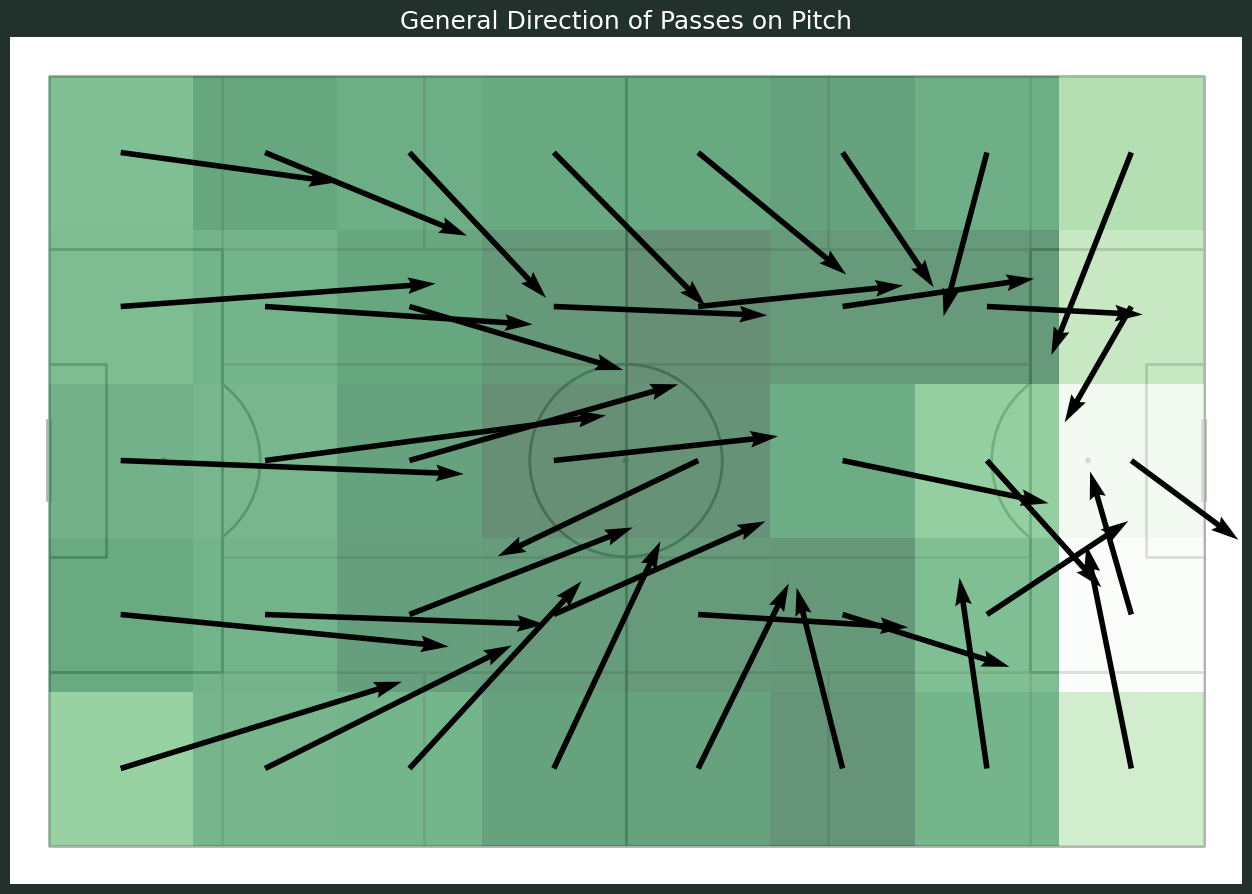

In [15]:
df_pass = merged
bins = (8,5)
pitch = Pitch(positional=True)
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')
# plot the heatmap - darker colors = more passes originating from that square
bs_heatmap = pitch.bin_statistic(df_pass.x1, df_pass.y1, statistic='count', bins=bins)
successful_bins = pitch.bin_statistic(successful.x1, successful.y1, statistic='count', bins=bins)
unsuccessful_bins = pitch.bin_statistic(unsuccessful.x1, unsuccessful.y1, statistic='count', bins=bins)
accuracies = successful_bins["statistic"]/(successful_bins["statistic"]+unsuccessful_bins["statistic"])
bs_heatmap["statistic"]=accuracies
hm = pitch.heatmap(bs_heatmap, ax=ax, cmap='Greens',alpha = .6)
# plot the pass flow map with a single color and the
# arrow length equal to the average distance in the cell
fm = pitch.flow(df_pass.x1, df_pass.y1, df_pass.x2, df_pass.y2, color='black',
                arrow_type='average', bins=bins, ax=ax)
plt.title("General Direction of Passes on Pitch",color = "white",fontsize = 18)

Text(0.5, 1.0, 'Passing Accuracy on Pitch')

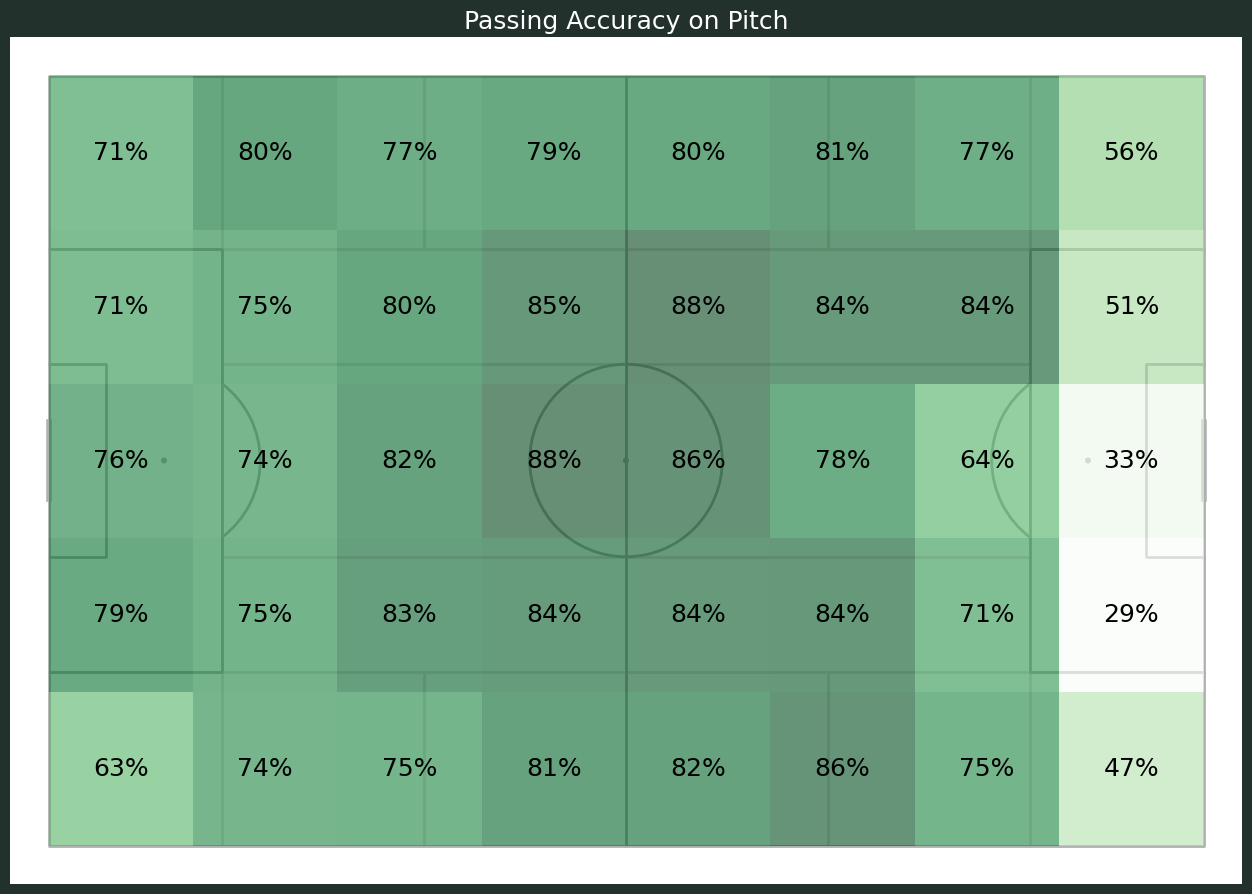

In [16]:
df_pass = merged
bins = (8,5)
pitch = Pitch(positional=True)
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')
# plot the heatmap - darker colors = more passes originating from that square
bs_heatmap = pitch.bin_statistic(df_pass.x1, df_pass.y1, statistic='count', bins=bins)
successful_bins = pitch.bin_statistic(successful.x1, successful.y1, statistic='count', bins=bins)
unsuccessful_bins = pitch.bin_statistic(unsuccessful.x1, unsuccessful.y1, statistic='count', bins=bins)
accuracies = successful_bins["statistic"]/(successful_bins["statistic"]+unsuccessful_bins["statistic"])
bs_heatmap["statistic"]=accuracies
hm = pitch.heatmap(bs_heatmap, ax=ax, cmap='Greens',alpha = .6)

labels2 = pitch.label_heatmap(bs_heatmap, color='black', fontsize=18,
                              ax=ax, ha='center', va='center',
                              str_format='{:.0%}',)
plt.title("Passing Accuracy on Pitch",color = "white",fontsize = 18)

Text(0.5, 1.0, 'Passing Accuracy into Areas on Pitch')

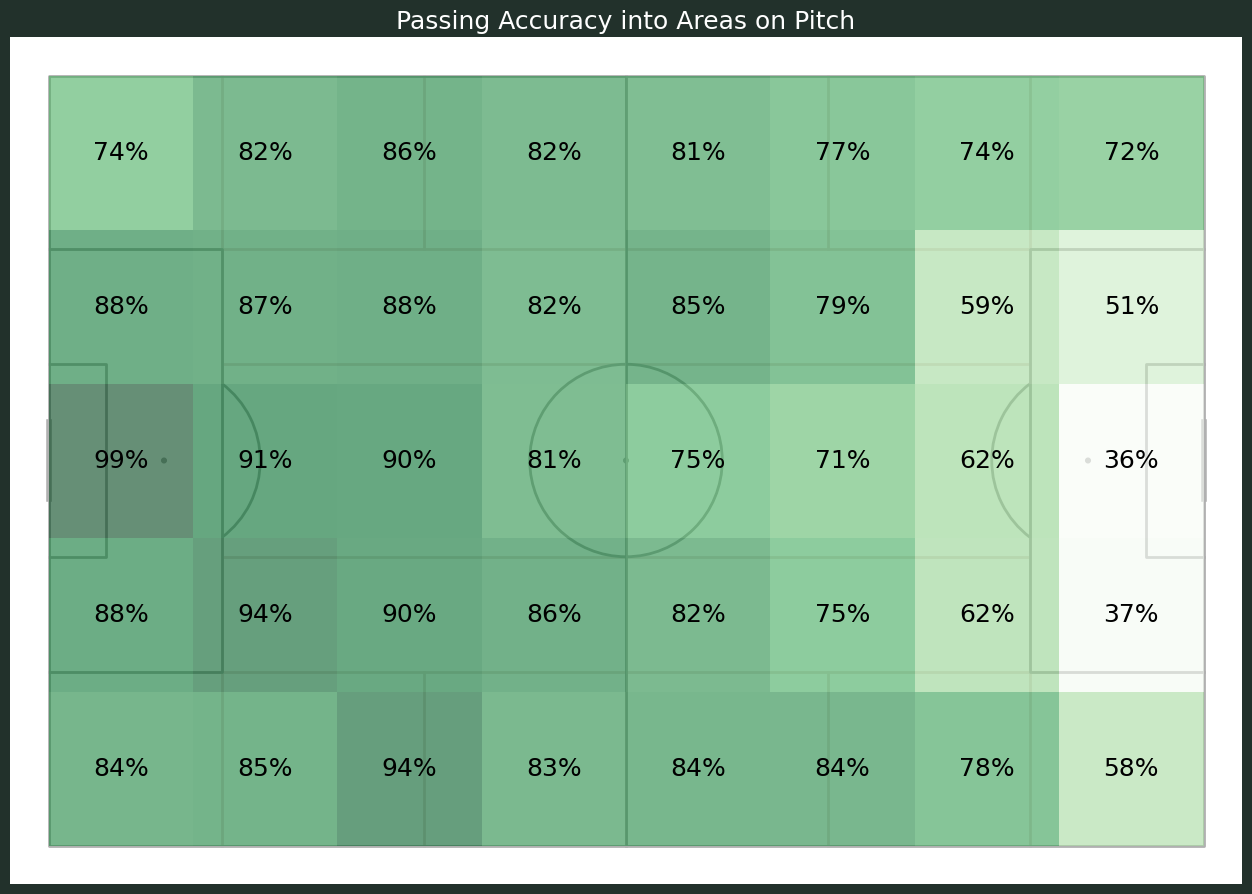

In [17]:
df_pass = merged
bins = (8,5)
pitch = Pitch(positional=True)
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')
# plot the heatmap - darker colors = more passes originating from that square
bs_heatmap = pitch.bin_statistic(df_pass.x2, df_pass.y2, statistic='count', bins=bins)
successful_bins = pitch.bin_statistic(successful.x2, successful.y2, statistic='count', bins=bins)
unsuccessful_bins = pitch.bin_statistic(unsuccessful.x2, unsuccessful.y2, statistic='count', bins=bins)
accuracies = successful_bins["statistic"]/(successful_bins["statistic"]+unsuccessful_bins["statistic"])
bs_heatmap["statistic"]=accuracies
hm = pitch.heatmap(bs_heatmap, ax=ax, cmap='Greens',alpha = .6)

labels2 = pitch.label_heatmap(bs_heatmap, color='black', fontsize=18,
                              ax=ax, ha='center', va='center',
                              str_format='{:.0%}',)
plt.title("Passing Accuracy into Areas on Pitch",color = "white",fontsize = 18)

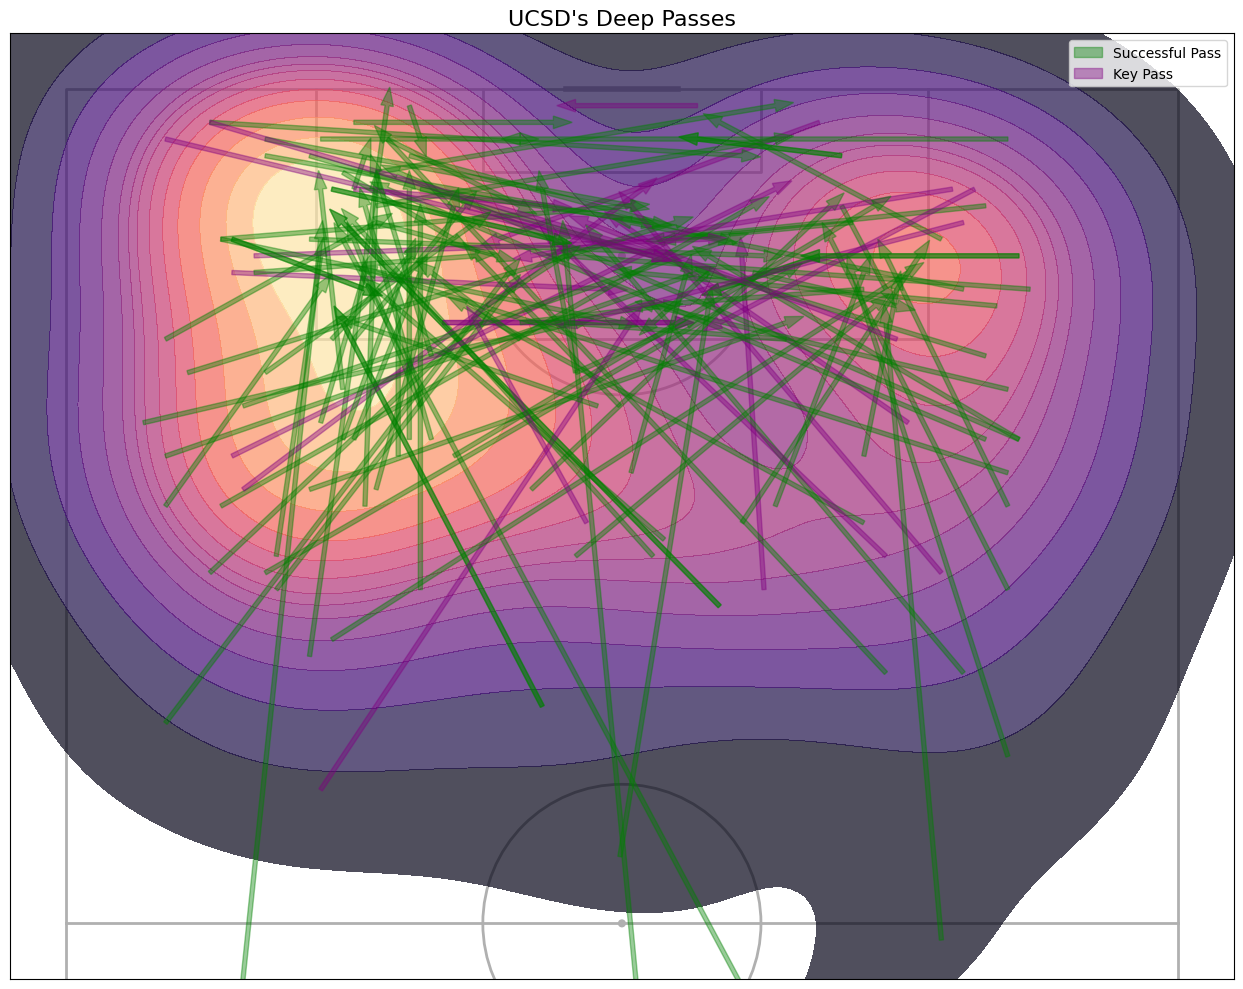

In [18]:
df = deepPasses
pitch = VerticalPitch(half=True, axis=True,)
fig, ax = pitch.draw(figsize=(14, 10))
kde = sns.kdeplot(y=df.get("x1"),x=df.get("y1"),fill = True,shade_lowest = False,alpha = .7,n_levels = 15,cmap = "magma")
for i in range(df.shape[0]):
    row = df.iloc[i]
    if row.get("key pass")==True:
        color = "purple"
        label = "Key Pass"
    elif row.get("result"):
        color = "green"
        label = "Successful Pass"
    else:
        color = "red"
        label = "Unsuccessful Pass"
    plt.arrow(row.get("y1"),row.get("x1"),(row.get("y2")-row.get("y1")),(row.get("x2")-row.get("x1")),width = .3,alpha = .4,color = color, label = label)
plt.title("UCSD's Deep Passes",fontsize = 16)
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
plt.legend(unique_labels.values(), unique_labels.keys())

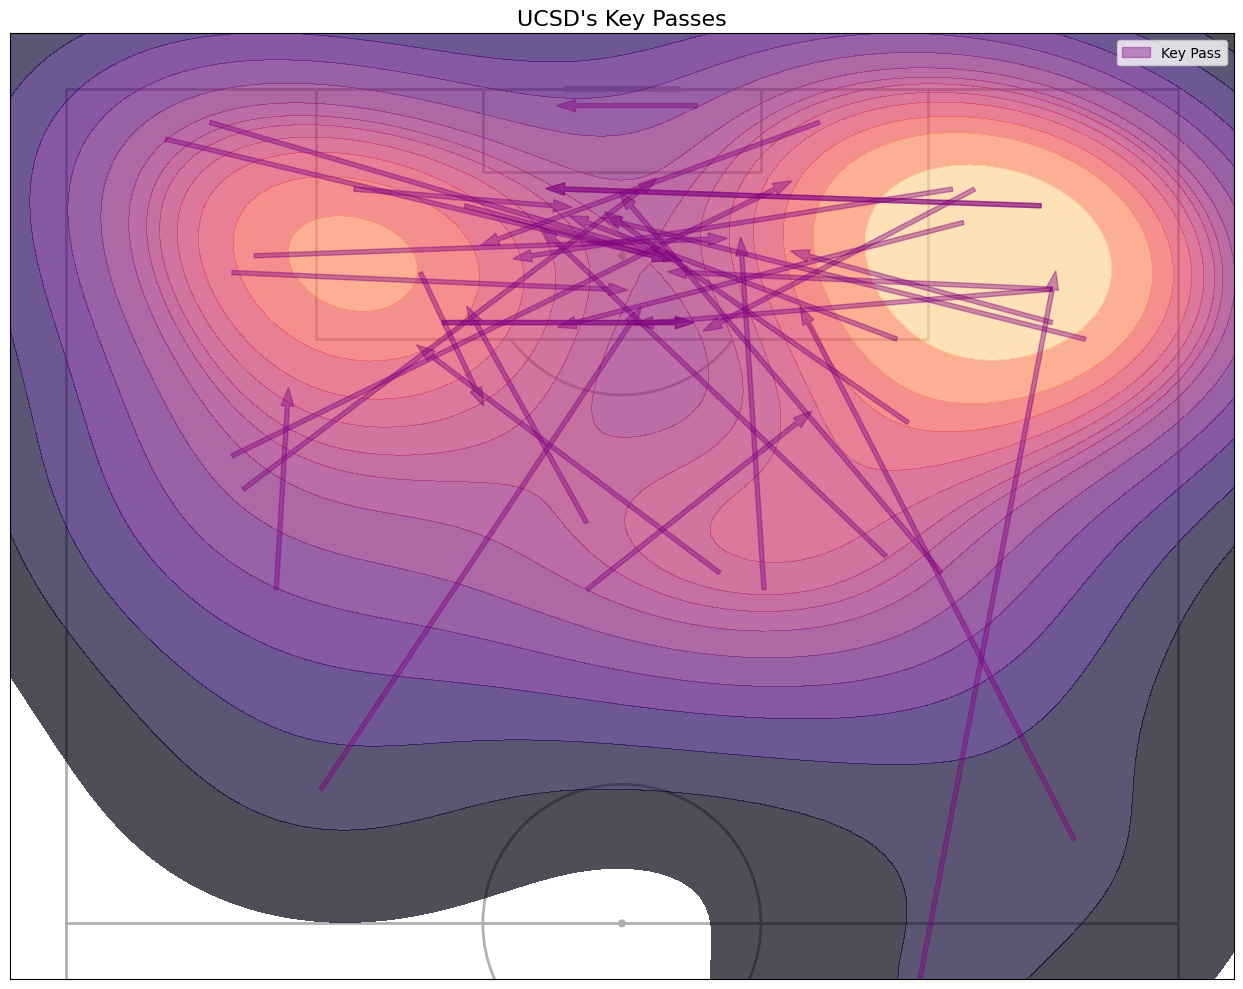

In [22]:
df = key
pitch = VerticalPitch(half=True, axis=True,)
fig, ax = pitch.draw(figsize=(14, 10))
kde = sns.kdeplot(y=df.get("x1"),x=df.get("y1"),fill = True,shade_lowest = False,alpha = .7,n_levels = 15,cmap = "magma")
for i in range(df.shape[0]):
    row = df.iloc[i]
    if row.get("key pass")==True:
        color = "purple"
        label = "Key Pass"
    elif row.get("result"):
        color = "green"
        label = "Successful Pass"
    else:
        color = "red"
        label = "Unsuccessful Pass"
    plt.arrow(row.get("y1"),row.get("x1"),(row.get("y2")-row.get("y1")),(row.get("x2")-row.get("x1")),width = .3,alpha = .4,color = color, label = label)
plt.title("UCSD's Key Passes",fontsize = 16)
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
plt.legend(unique_labels.values(), unique_labels.keys())

In [38]:
ser = key.groupby("Player")["result"].sum()
ser.name = "Key Passes"
ser.sort_values(ascending=False)

Player
Jonah     5
James     4
Kai       4
Max       4
McGee     4
Cole      3
Quinn     3
Val       3
Adam      1
Brian     1
Carter    1
Nikita    1
Name: Key Passes, dtype: int64

In [39]:
ser = deepPasses.groupby("Player")["result"].sum()
ser.name= "Deep Passes"
ser.sort_values(ascending=False)

Player
McGee      22
Quinn      17
Kai        13
Max        12
Carter     11
Val        10
Cole        8
James       7
Jonah       7
Connor      5
Brian       4
Adam        3
Evan        3
Ryan        2
Nolan       1
Matt        1
Nikita      1
Michael     1
Keenai      1
Woody       1
Name: Deep Passes, dtype: int64

Text(0.5, 1.0, 'UCSD Unsuccessful Passes in Defensive Third Ending Location')

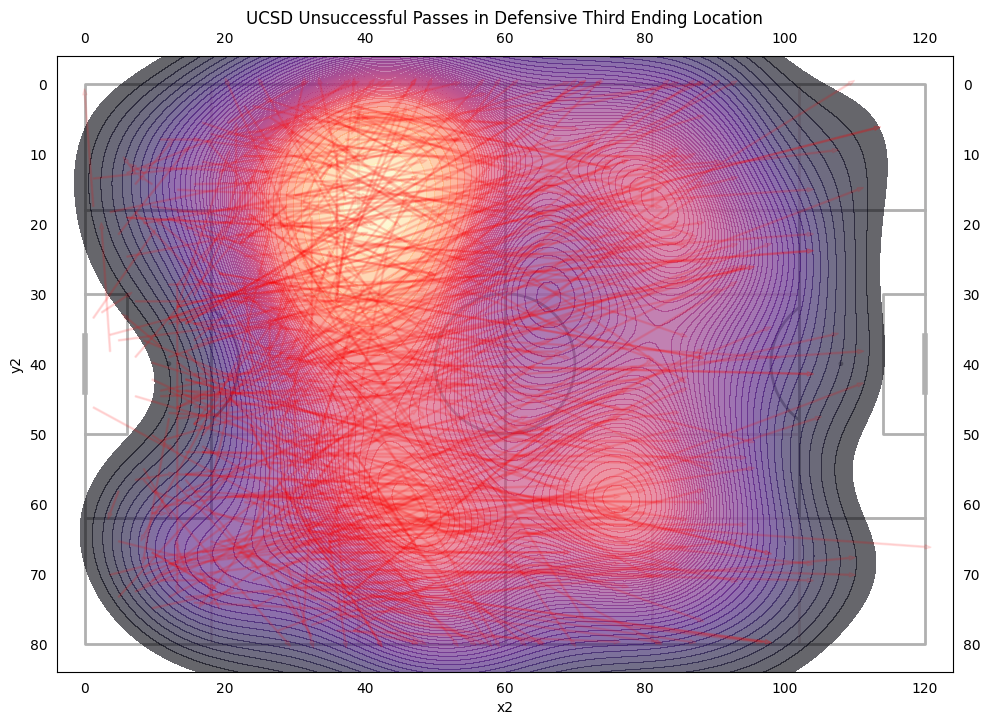

In [27]:
df = unsuccessful[unsuccessful["x1"]<40]
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (13,8))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=df.get("x2"),y=df.get("y2"),fill = True,shade_lowest = False,alpha = .6,n_levels = 60,cmap = "magma")
for i in range(df.shape[0]):
    row = df.iloc[i]
    if row.get("key pass")==True:
        color = "purple"
    elif row.get("result"):
        color = "green"
    else:
        color = "red"
    
    plt.arrow(row.get("x1"),row.get("y1"),row.get("x2")-row.get("x1"),row.get("y2")-row.get("y1"),width = .2,alpha = .1,color = color)
plt.title("UCSD Unsuccessful Passes in Defensive Third Ending Location")

Text(0.5, 1.0, 'UCSD Unsuccessful Passes in Defensive Third Ending Location')

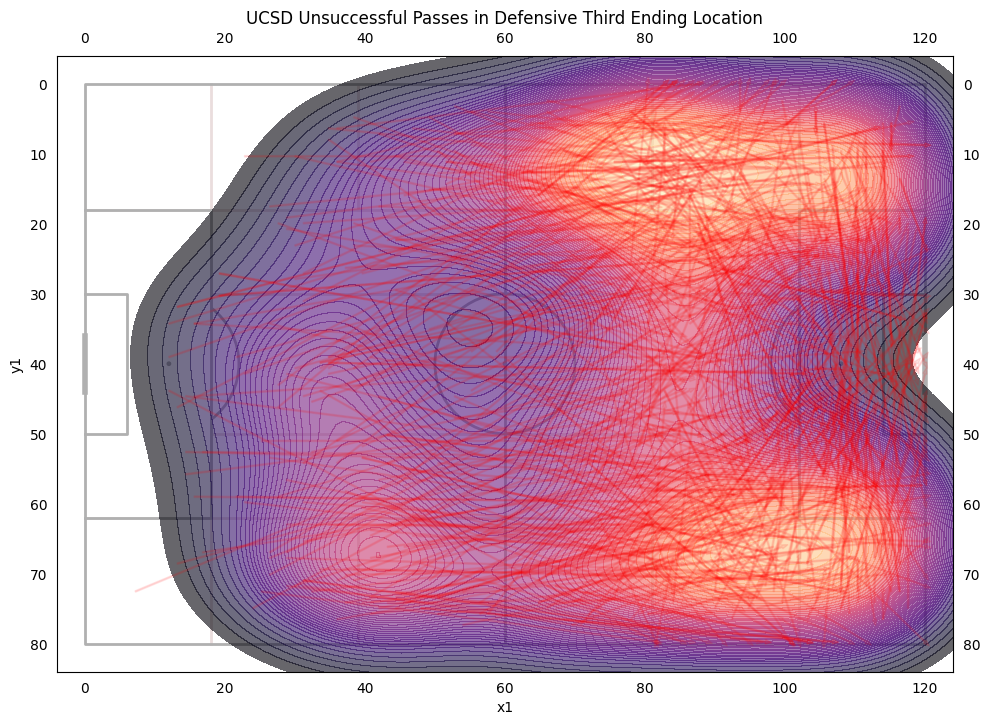

In [29]:
df = unsuccessful[unsuccessful["x2"]>80]
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (13,8))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=df.get("x1"),y=df.get("y1"),fill = True,shade_lowest = False,alpha = .6,n_levels = 60,cmap = "magma")
for i in range(df.shape[0]):
    row = df.iloc[i]
    if row.get("key pass")==True:
        color = "purple"
    elif row.get("result"):
        color = "green"
    else:
        color = "red"
    
    plt.arrow(row.get("x1"),row.get("y1"),row.get("x2")-row.get("x1"),row.get("y2")-row.get("y1"),width = .2,alpha = .1,color = color)
plt.title("UCSD Unsuccessful Passes in Defensive Third Ending Location")